In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import svm
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd 
from pandas import Series,DataFrame
import seaborn as sns
from scipy import stats

In [221]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        pvalue=format(pvalue,'.4f')
        return str(pvalue)
    elif pvalue <= 0.001:
        pvalue=format(pvalue,'.4f')
        return str(pvalue)
    elif pvalue <= 0.01:
        pvalue=format(pvalue,'.4f')
        return str(pvalue)
    elif pvalue <= 0.05:
        pvalue=format(pvalue,'.4f')
        return str(pvalue)
    return "ns"


0.00312111496903595


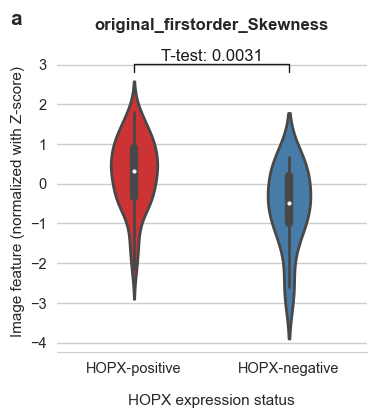

In [227]:
#111-HOPX-8 image features
def expression_type(s):
    it = {b'normal/over':0, b'low':1}
    return it[s]

df = pd.read_csv("/path of data distribution plot.csv/",header=0,index_col=0)


x1,x2,y =df['original_firstorder_Skewness'],df['wavelet-LLL_firstorder_RootMeanSquared'],df['group']

data_p = df[["original_firstorder_Skewness","group"]]
stat,p_value = stats.ttest_ind(data_p[data_p["group"]=="HOPX-negative"]["original_firstorder_Skewness"],
                                     data_p[data_p["group"]=="HOPX-positive"]["original_firstorder_Skewness"],
                                     equal_var=False)
print(p_value)
p_value_cov=convert_pvalue_to_asterisks(p_value)

fig,ax = plt.subplots(figsize=(4,4),dpi=100,facecolor="w")
ax = sns.set(style="whitegrid", palette="Set1", color_codes=True)     #set( )设置主题，调色板更常用  
ax = sns.violinplot(x="group",y="original_firstorder_Skewness",data=df,palette='Set1',width=0.3,inner='box',linewidth=2, )

# 添加P值
x1, x2 = 0, 1
y,h = data_p["original_firstorder_Skewness"].max()+1,.2
#绘制横线位置
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k") 
#添加P值
ax.text((x1+x2)*.5, y+h, "T-test: "+ p_value_cov, ha='center', va='bottom', color="k")
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=10.5,bottom=False,pad=7)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(0.8)
#ax.grid(axis='y',ls='--',c='gray')
ax.set_axisbelow(True)

plt.xlabel('HOPX expression status',labelpad=13,fontsize=11)
plt.ylabel('Image feature (normalized with Z-score)',fontsize=11)
plt.text(-0.8,4,"a",fontweight='bold',fontsize=15)
plt.title('original_firstorder_Skewness',fontweight='bold',fontsize=12,pad=15)

val=0.5
ax.set_xlim(0-val, 1+val)

plt.savefig('/path to save violinplot.png/',dpi=800,bbox_inches='tight')

#plt.figure(figsize=(6,5))
#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.set(style="whitegrid", palette="Set1", color_codes=True)     #set( )设置主题，调色板更常用  
#sns.violinplot(y='original_firstorder_Skewness',x='group',width=0.3,data=df,inner='box',linewidth=3)
#plt.xlabel('HOPX expression status',labelpad=18,fontsize=13)
#plt.ylabel('Image feature (normalized with Z-score)',fontsize=13)
#plt.title('original_firstorder_Skewness',fontweight='bold',fontsize=15,pad=18)

#print stats.ttest_ind(rvs1,rvs2)